In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:

# Directories for the dataset
train_dir = 'skin.disease/skin.disease.split/train'
valid_dir = 'skin.disease/skin.disease.split/valid'
test_dir = 'skin.disease/skin.disease.split/test'



In [3]:
# Parameters
img_size = (224, 224)  # Input image size
batch_size = 32
num_classes = 4  # acne, atopic, bcc, melanoma
epochs = 54  # Increase as necessary



In [4]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)



In [5]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 6960 images belonging to 4 classes.
Found 288 images belonging to 4 classes.


In [6]:
# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(num_classes, activation='softmax'))


C:\Users\azcos5\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=valid_generator.samples // batch_size,
)

Epoch 1/54


C:\Users\azcos5\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


217/217 ━━━━━━━━━━━━━━━━━━━━ 173s 770ms/step - accuracy: 0.4992 - loss: 1.1070 - val_accuracy: 0.5174 - val_loss: 0.9733
Epoch 2/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.5938 - loss: 0.9259  
Epoch 3/54


C:\Users\azcos5\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


217/217 ━━━━━━━━━━━━━━━━━━━━ 129s 583ms/step - accuracy: 0.5952 - loss: 0.8979 - val_accuracy: 0.6528 - val_loss: 0.7342
Epoch 4/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.6250 - loss: 0.7643  
Epoch 5/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 129s 583ms/step - accuracy: 0.6270 - loss: 0.8487 - val_accuracy: 0.7153 - val_loss: 0.7105
Epoch 6/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.5938 - loss: 0.8338  
Epoch 7/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 129s 582ms/step - accuracy: 0.6395 - loss: 0.7926 - val_accuracy: 0.7188 - val_loss: 0.6439
Epoch 8/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.6875 - loss: 0.8277  
Epoch 9/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 128s 579ms/step - accuracy: 0.6502 - loss: 0.7717 - val_accuracy: 0.7153 - val_loss: 0.6410
Epoch 10/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.6250 - loss: 0.7763  
Epoch 11/54
217/217 ━━━━━━━━━━━━━━━━━━━━ 129s 580ms/step - accuracy: 0.6571 - loss: 0.7479 - val_accuracy: 0.7049 - val_lo

In [9]:
# Print validation accuracy after initial training
print(f"Validation accuracy after initial training: {max(history.history['val_accuracy']) * 100:.2f}%")


Validation accuracy after initial training: 86.81%


In [10]:
# Save the model in the recommended Keras format
model.save('skin_disease_classifier_v2.keras')


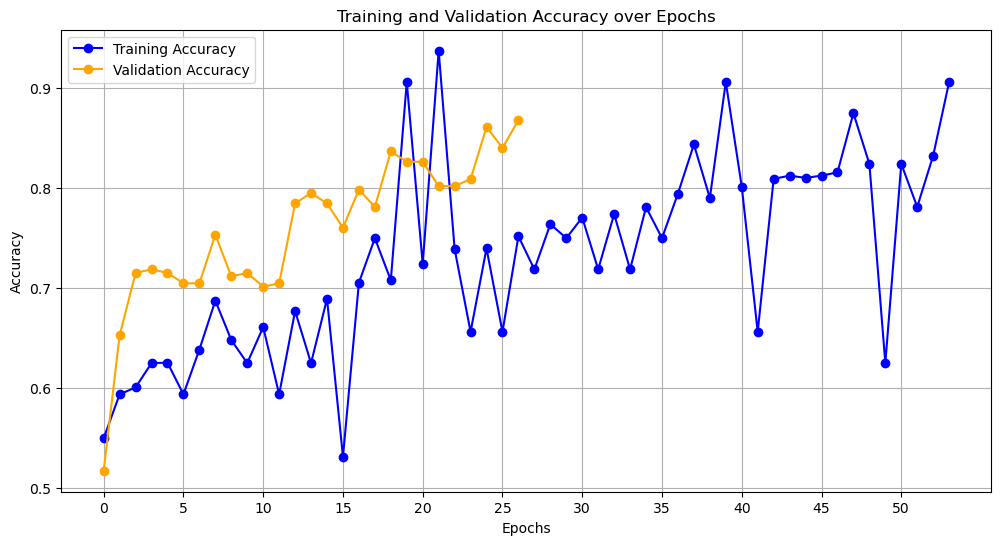

In [11]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, epochs, 5))  # Adjust x-ticks to show every 5 epochs
plt.grid()
plt.legend()
plt.show()


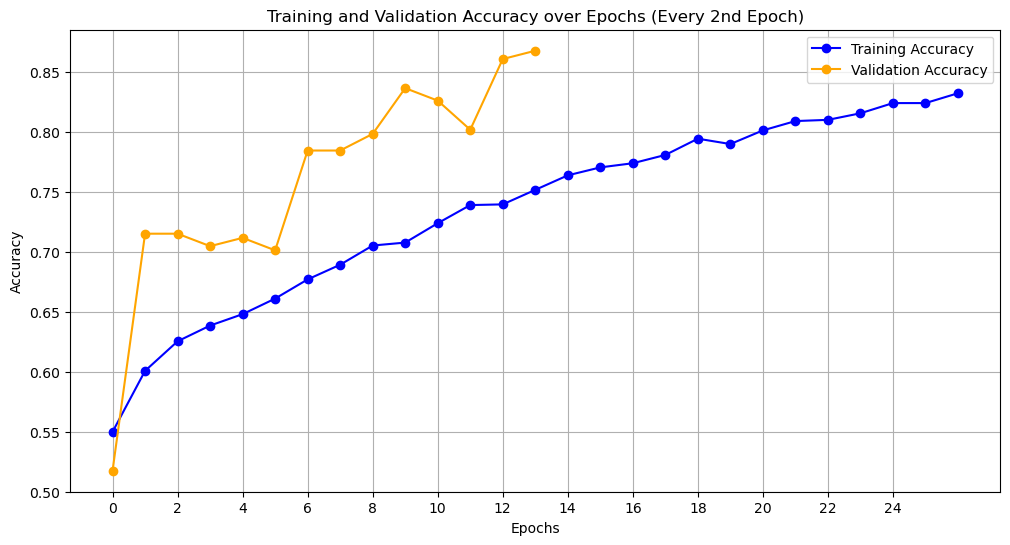

In [12]:
import matplotlib.pyplot as plt

# Ensure epochs is an integer
epochs = 26  # Ensure this matches your earlier definition

# Plotting training and validation accuracy for every other epoch
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'][::2], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'][::2], label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy over Epochs (Every 2nd Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, epochs, 2))  # Set x-ticks to show every 2 epochs
plt.grid()
plt.legend()
plt.show()
